In [1]:
import numpy as np
import contactModel as c
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('experimentalData')
x = np.transpose(data['data']['x'][0][0]).reshape(-1)
y = np.transpose(data['data']['y'][0][0]).reshape(-1)
h = np.transpose(data['data']['h'][0][0]).reshape(-1)
h = h-np.max(h)
r = np.transpose(data['data']['R'][0][0]).reshape(-1)

In [12]:
variables = {'h': h,
            'r': r,
            'x': x,
            'y': y,
            'E': 1850000,
            'nu': .49}
model = c.surface(variables)

In [13]:
model.solveNormalContact(indentations = np.linspace(0,1.5e-4,100))

/Users/kjetilthogersen/Dropbox/Min Mac (eduroam-193-157-165-96.wlan.uio.no)/Documents/GitHub/frictionPrediction/contactModel.py:38: RuntimeWarning: invalid value encountered in sqrt
  a = (self.r*z)**.5
/Users/kjetilthogersen/Dropbox/Min Mac (eduroam-193-157-165-96.wlan.uio.no)/Documents/GitHub/frictionPrediction/contactModel.py:85: RuntimeWarning: invalid value encountered in sqrt
  a[a<eps] = (self.r[a<eps]*(z[a<eps]-u[a<eps]))**.5


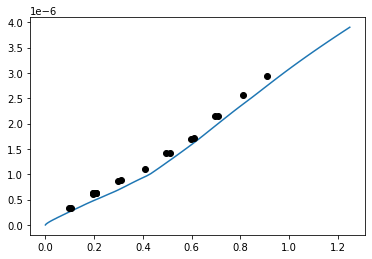

In [6]:
plt.plot(model.normal_force,model.contact_area)
plt.plot(data['data']['N'][0][0],data['data']['total_A'][0][0][:,0],'ok')